In [1]:
import pandas as pd
import os

file_path = os.path.join('data', 'processed', 'TMR_COMPILADO.csv')
df = pd.read_csv(file_path, encoding='latin1', sep=';')  # por si viene separado por punto y coma

# Definir columnas numéricas y no numéricas
numeric_cols_noTLASmax = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temperature [øC]']
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'Airline (Name)', 'From/To', 'Callsign', 'Aircraft Type']

# Convertir columnas numéricas (reemplazando comas por puntos y convirtiendo a float)
for col in numeric_cols_noTLASmax:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Verificar tipos de datos
print(df.dtypes)

# Separar datos numéricos y no numéricos
numeric_data = df[numeric_cols_noTLASmax]
non_numeric_data = df[non_numeric_cols]


NMT                  object
TLASmax              object
LASmax              float64
SEL                 float64
Leq                 float64
LAZ                 float64
EPNL                float64
Temperature [øC]    float64
A/D                  object
Runway               object
Flight               object
Airline              object
Airline (Name)       object
From/To              object
Callsign             object
Aircraft Type        object
dtype: object


In [2]:
# Mostrar información general del DataFrame
print(df.info())

# Resumen estadístico de variables numéricas
print(df.describe())

# Contar valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284309 entries, 0 to 284308
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NMT               284309 non-null  object 
 1   TLASmax           284309 non-null  object 
 2   LASmax            284309 non-null  float64
 3   SEL               284309 non-null  float64
 4   Leq               284309 non-null  float64
 5   LAZ               284309 non-null  float64
 6   EPNL              281264 non-null  float64
 7   Temperature [øC]  283709 non-null  float64
 8   A/D               155022 non-null  object 
 9   Runway            154221 non-null  object 
 10  Flight            155022 non-null  object 
 11  Airline           155022 non-null  object 
 12  Airline (Name)    128363 non-null  object 
 13  From/To           155022 non-null  object 
 14  Callsign          155022 non-null  object 
 15  Aircraft Type     155022 non-null  object 
dtypes: float64(6), objec

In [3]:
#borramos esta columna porque nos estregaba un dato repetido y ademas habia falta de datos.
df = df.drop('Airline (Name)', axis=1)

In [4]:
# Identificar valores nulos
print(df.isnull().sum())

NMT                      0
TLASmax                  0
LASmax                   0
SEL                      0
Leq                      0
LAZ                      0
EPNL                  3045
Temperature [øC]       600
A/D                 129287
Runway              130088
Flight              129287
Airline             129287
From/To             129287
Callsign            129287
Aircraft Type       129287
dtype: int64


In [5]:
df = df.dropna()
# Identificar valores nulos
print(df.isnull().sum())

NMT                 0
TLASmax             0
LASmax              0
SEL                 0
Leq                 0
LAZ                 0
EPNL                0
Temperature [øC]    0
A/D                 0
Runway              0
Flight              0
Airline             0
From/To             0
Callsign            0
Aircraft Type       0
dtype: int64


Distribución de NMT:
NMT
MP02    61035
MP03    52612
MP01    39035
Name: count, dtype: int64


Distribución de A/D:
A/D
Departure    138024
Arrival       14658
Name: count, dtype: int64


Distribución de Runway:
Runway
17L    117622
17R     32573
35R      2355
35L       132
Name: count, dtype: int64


Distribución de Flight:
Flight
LAN801     707
AAL912     664
CCACV      662
LNE1446    654
DAL146     650
          ... 
LAN1107      1
LAN93        1
SKU2622      1
ABD4811      1
MOLOT        1
Name: count, Length: 3106, dtype: int64


Distribución de Airline:
Airline
LAN    60360
SKU    20318
LXP    16603
JAT    12428
TAM     4519
       ...  
PSR        1
N75        1
KPO        1
N62        1
FWK        1
Name: count, Length: 413, dtype: int64


Distribución de From/To:
From/To
SCCF    10763
SCFA     9968
SCTE     9759
SPJC     8603
SBGR     8292
        ...  
MHLM        1
SBSL        1
SCQY        1
SCPG        1
SCVV        1
Name: count, Length: 253, dtype: int64


Distribución d

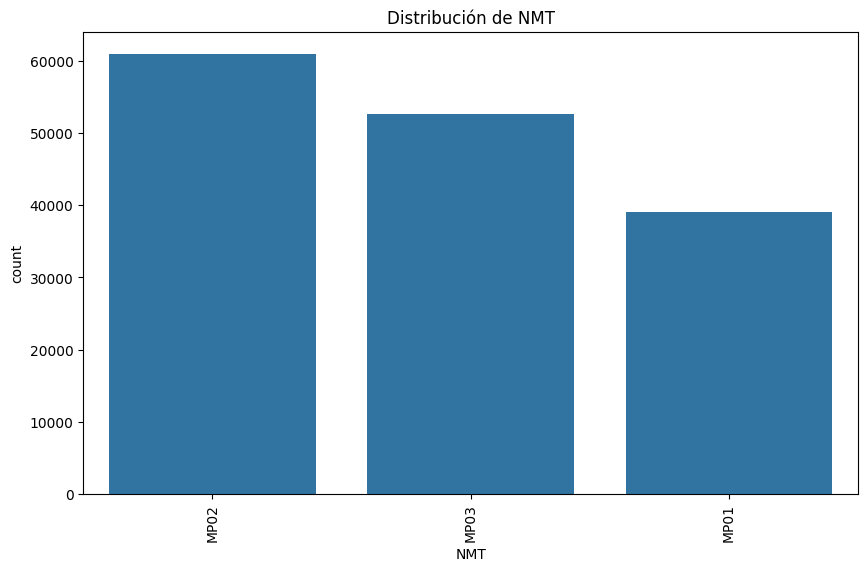

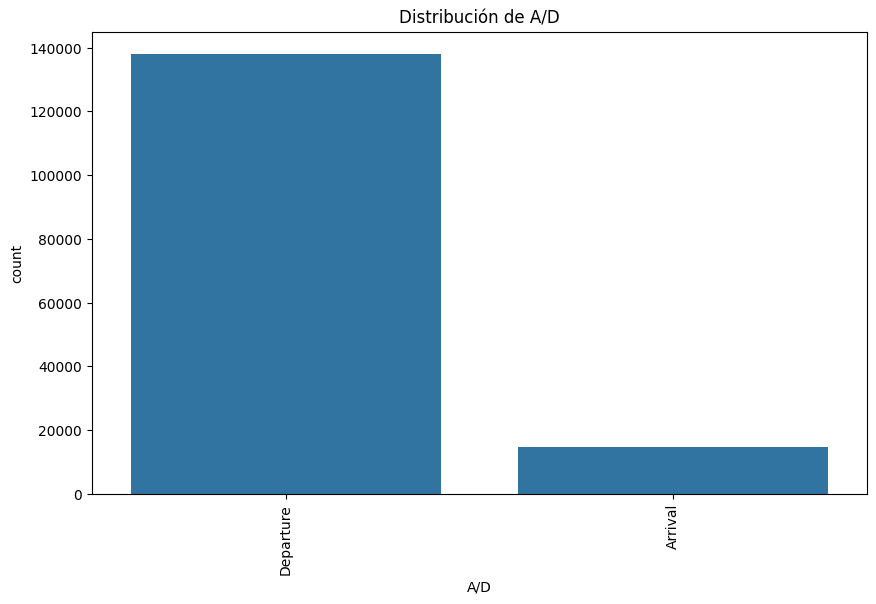

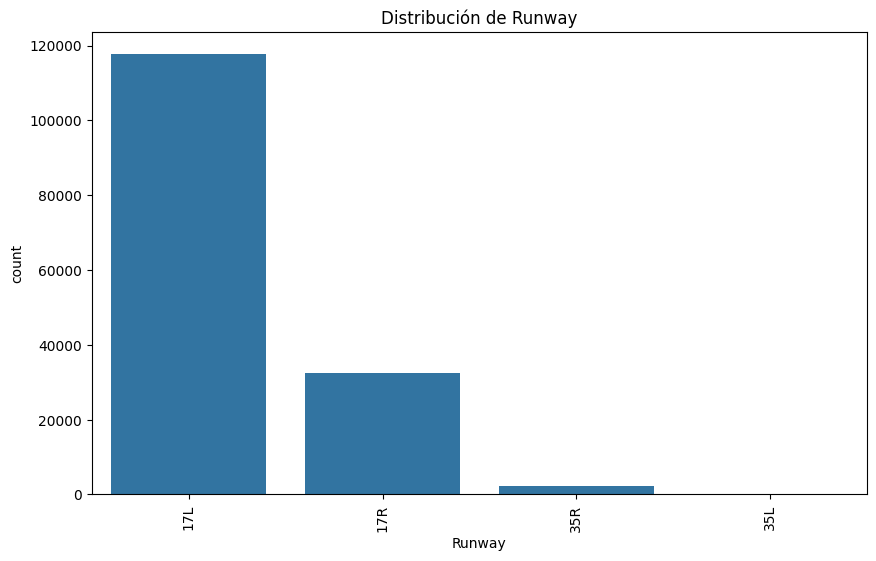

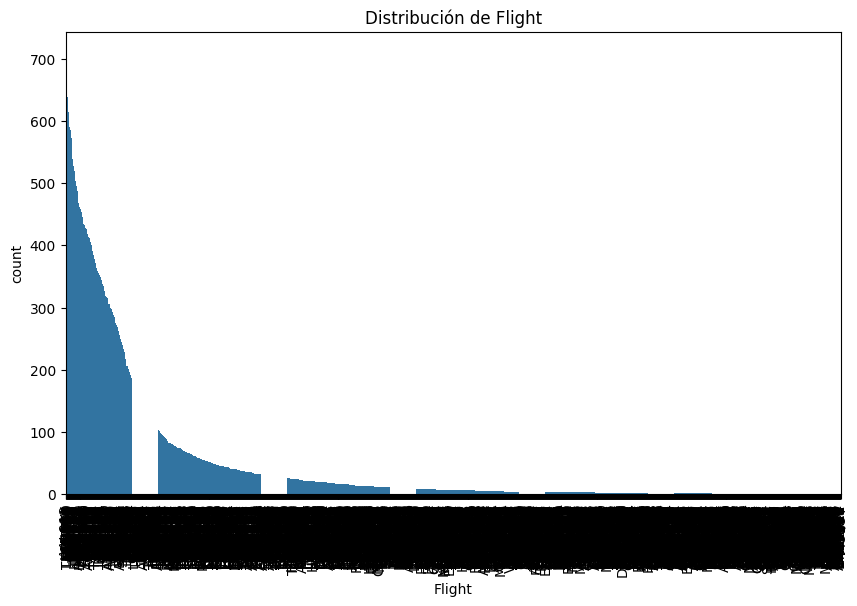

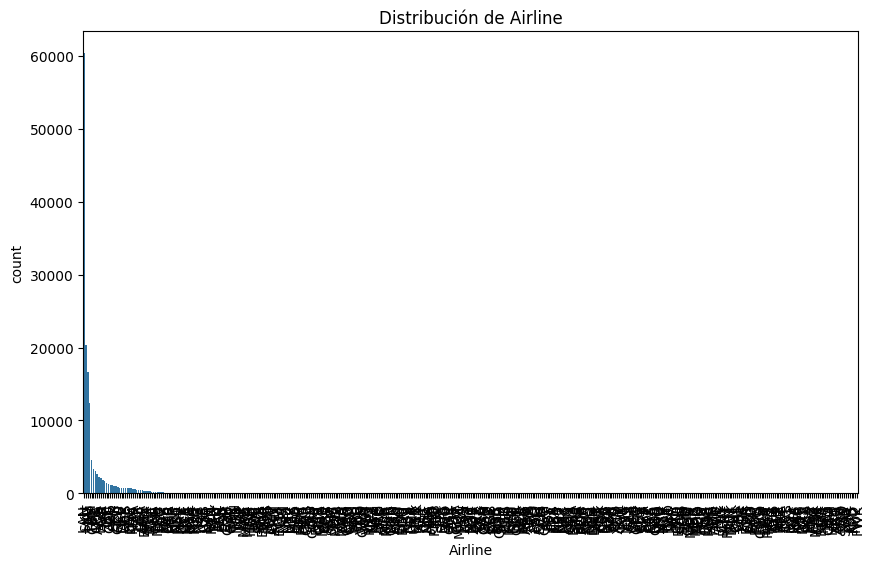

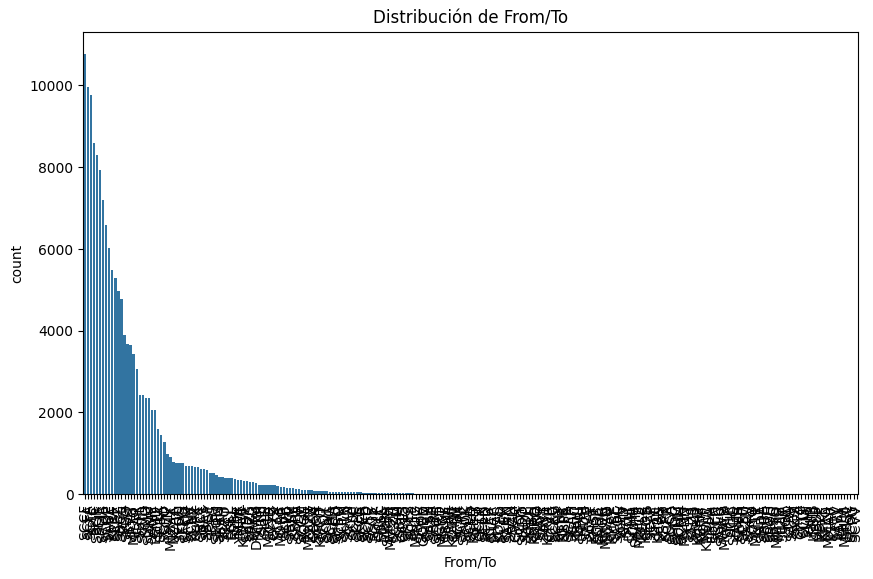

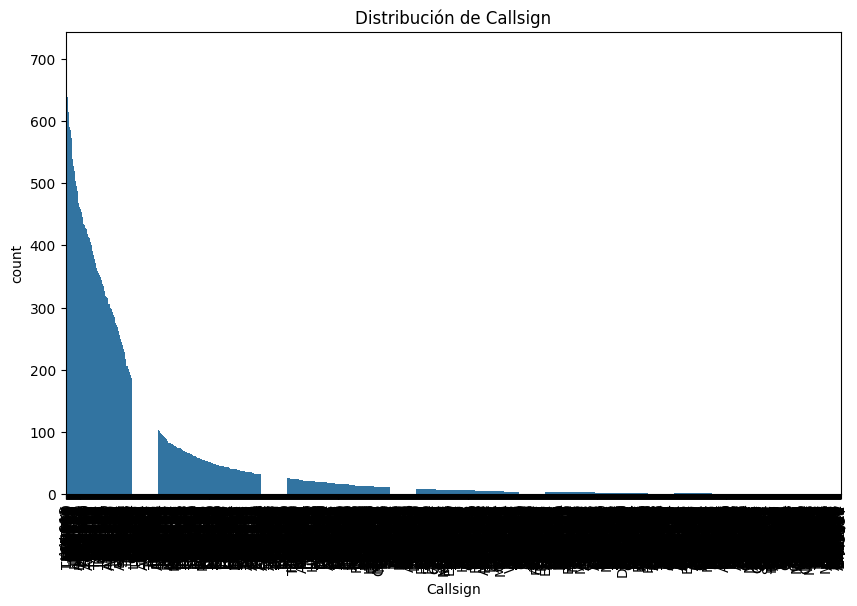

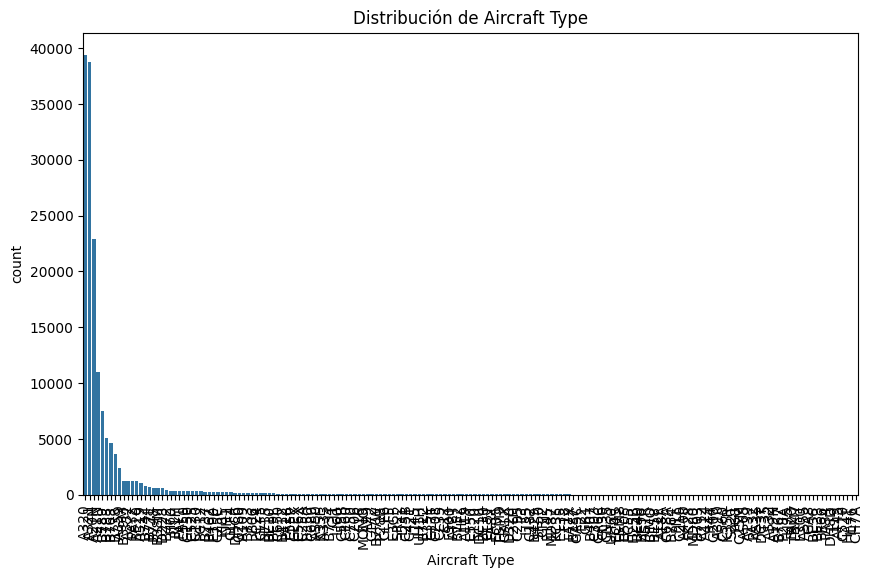

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  # Asegúrate de tener también importado seaborn

# Definir columnas numéricas y no numéricas
numeric_cols_noTLASmax = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temperature [øC]']
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'From/To', 'Callsign', 'Aircraft Type']
# Separar datos numéricos y no numéricos
numeric_data = df[numeric_cols_noTLASmax]
non_numeric_data = df[non_numeric_cols]

# Conteo de valores únicos
for col in non_numeric_data:
    print(f"Distribución de {col}:")
    print(df[col].value_counts())
    print("\n")

# Gráficos de barras
for col in non_numeric_data:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribución de {col}')
    plt.show()

C:\Users\claup\AppData\Local\Temp\ipykernel_2744\1003979264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')


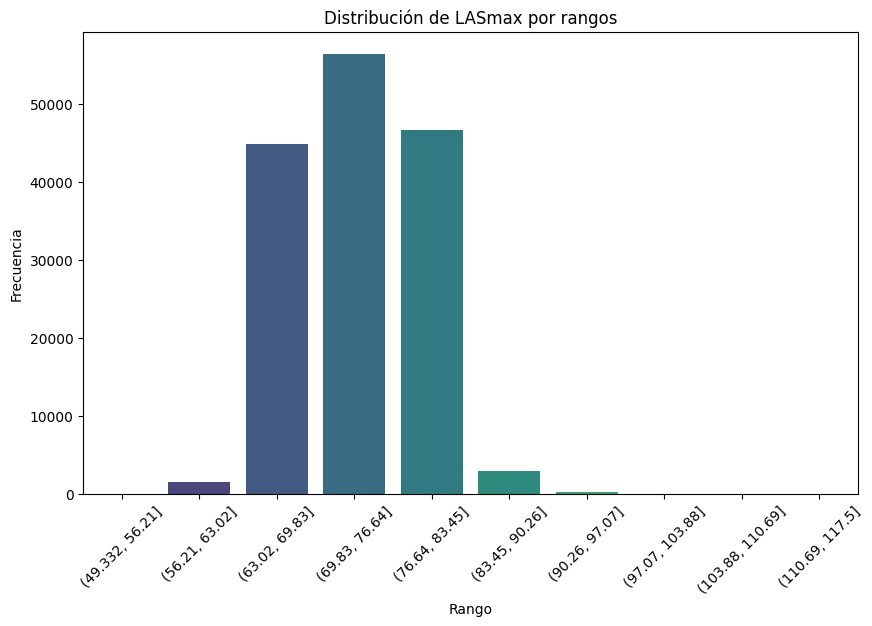

C:\Users\claup\AppData\Local\Temp\ipykernel_2744\1003979264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')


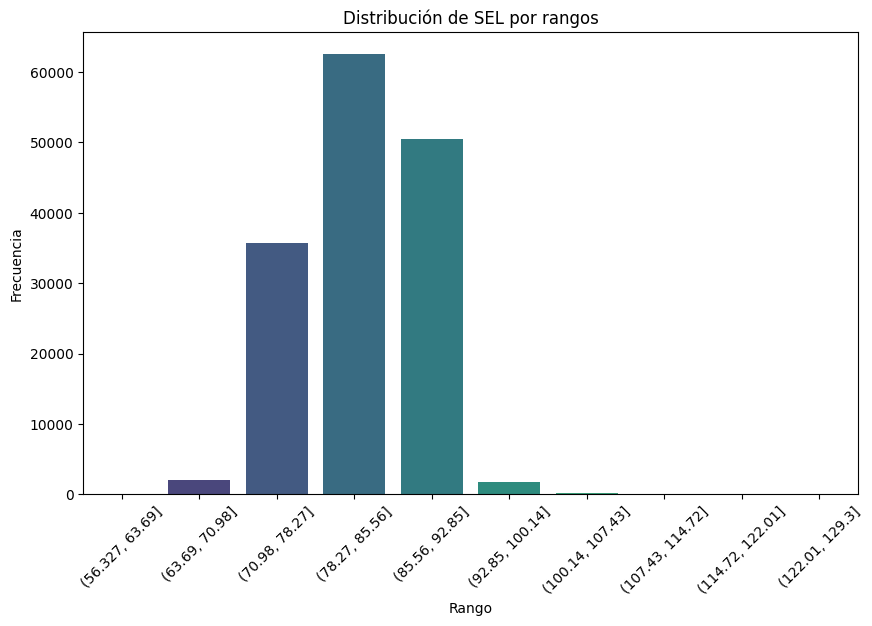

C:\Users\claup\AppData\Local\Temp\ipykernel_2744\1003979264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')


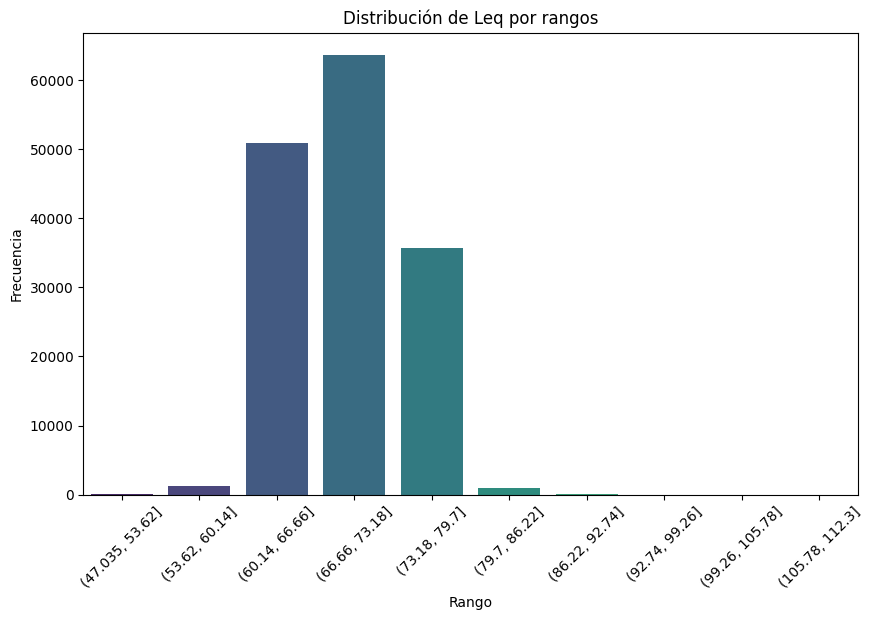

C:\Users\claup\AppData\Local\Temp\ipykernel_2744\1003979264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')


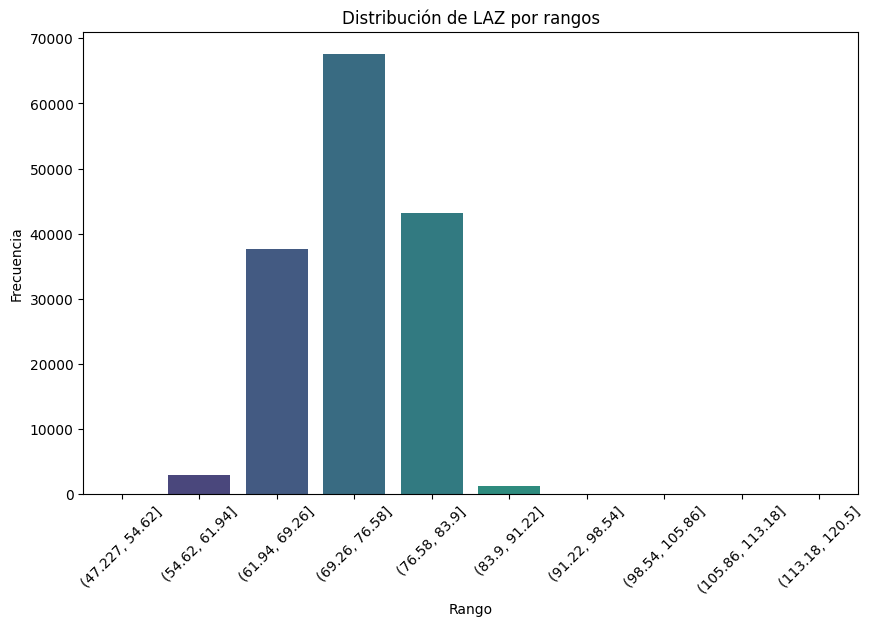

C:\Users\claup\AppData\Local\Temp\ipykernel_2744\1003979264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')


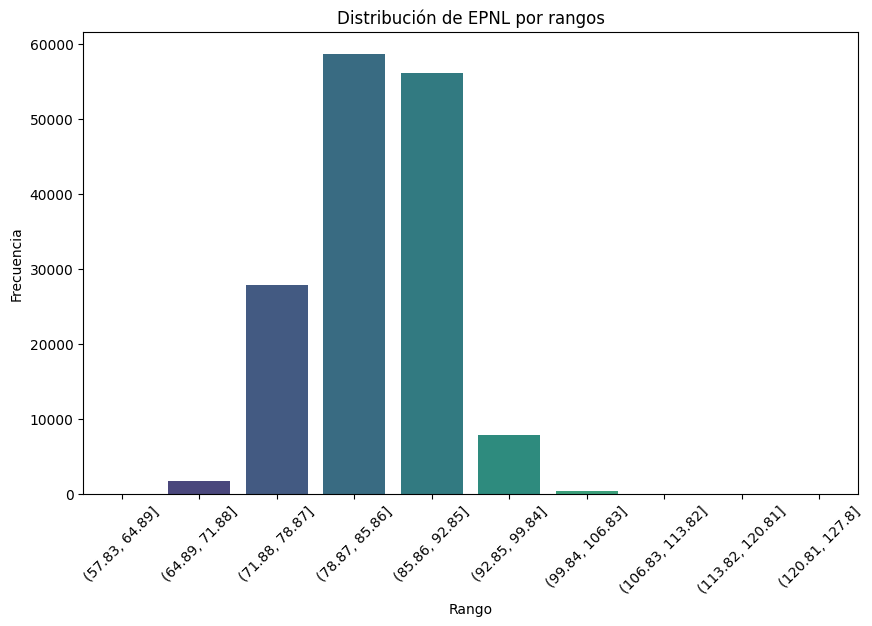

C:\Users\claup\AppData\Local\Temp\ipykernel_2744\1003979264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')


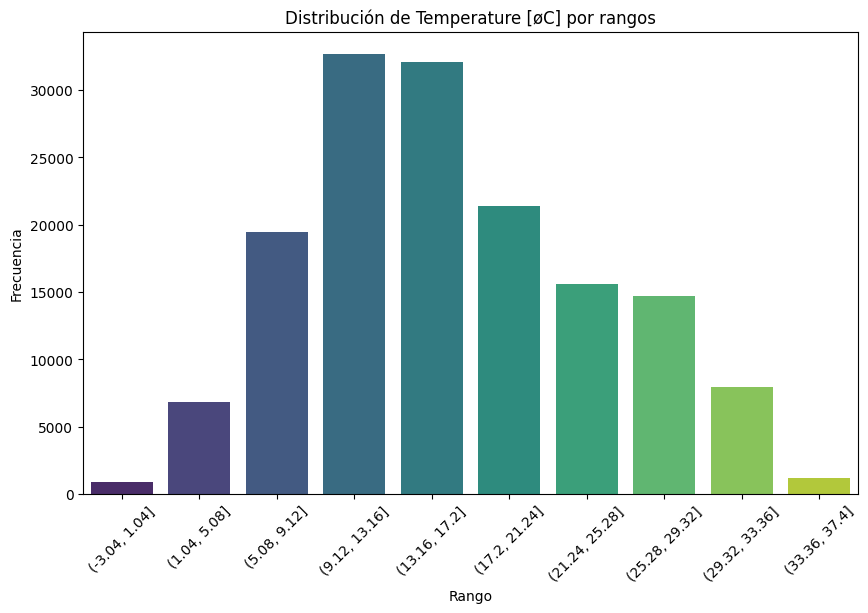

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas numéricas
numeric_cols = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temperature [øC]']

# Crear rangos para cada columna numérica
for col in numeric_cols:
    # Dividir los valores en 10 rangos (puedes ajustar el número)
    df[f'{col}_Range'] = pd.cut(df[col], bins=10)

    # Contar valores por rango
    range_counts = df[f'{col}_Range'].value_counts().sort_index()

    # Gráfico de barras para los rangos
    plt.figure(figsize=(10, 6))
    sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='viridis')
    plt.title(f'Distribución de {col} por rangos')
    plt.xlabel('Rango')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
    plt.show()

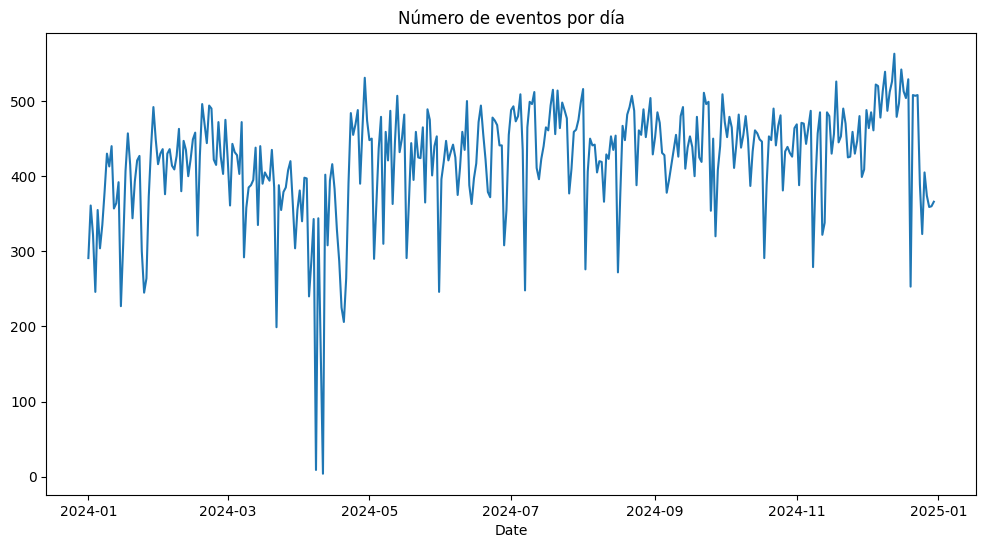

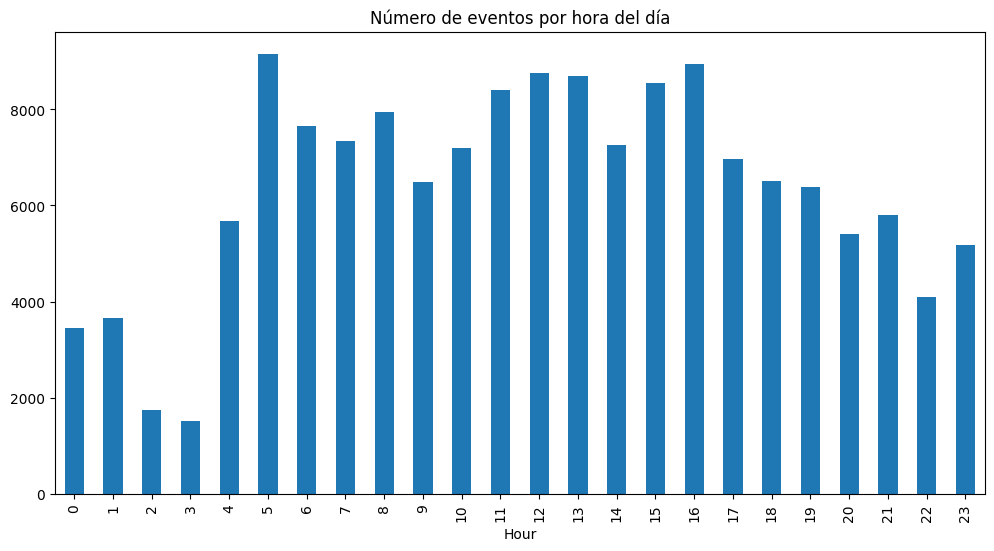

In [8]:
# Convertir Timestamp a tipo datetime
df['TLASmax'] = pd.to_datetime(df['TLASmax'], format='%d/%m/%Y %H:%M:%S')

# Crear columnas adicionales para análisis
df['Date'] = df['TLASmax'].dt.date
df['Hour'] = df['TLASmax'].dt.hour
df['DayOfWeek'] = df['TLASmax'].dt.day_name()

# Gráficos temporales
plt.figure(figsize=(12, 6))
df.groupby('Date').size().plot(kind='line', title='Número de eventos por día')
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('Hour').size().plot(kind='bar', title='Número de eventos por hora del día')
plt.show()

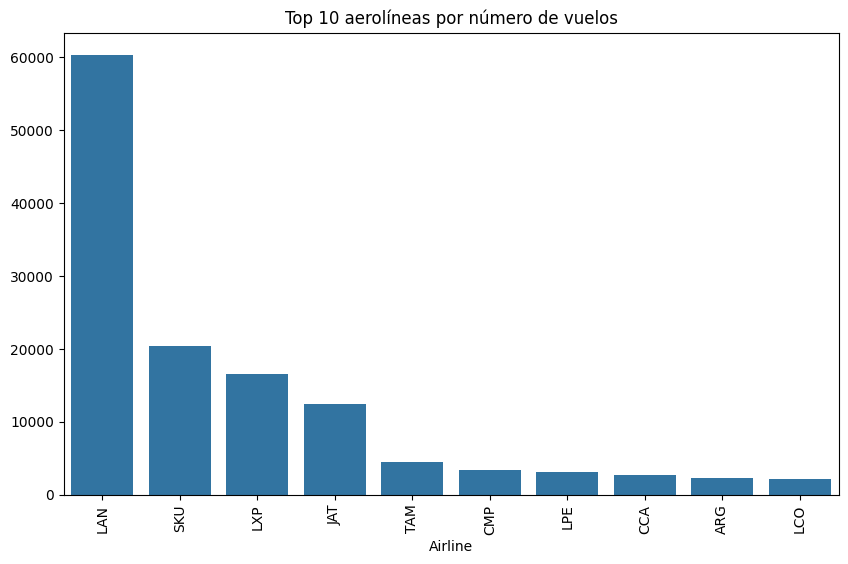

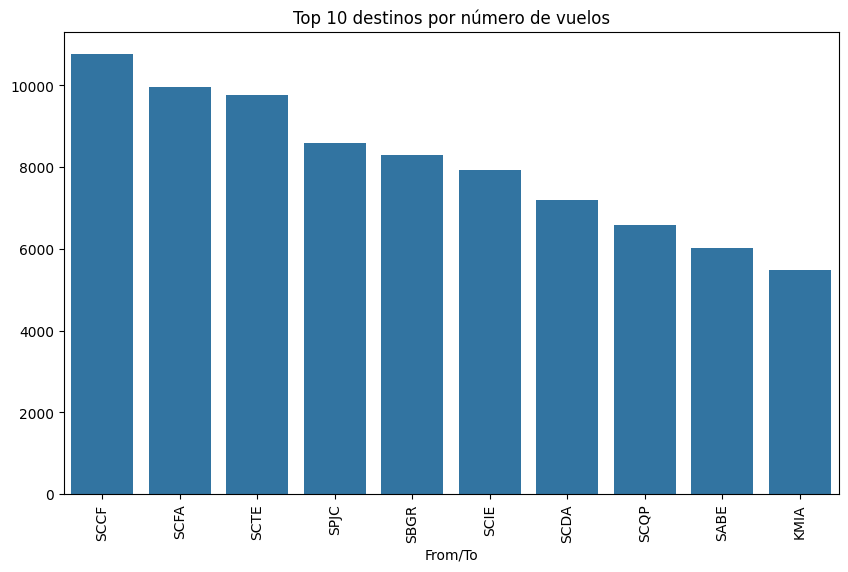

In [9]:
# Top aerolíneas por número de vuelos
top_airlines = df['Airline'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.xticks(rotation=90)
plt.title('Top 10 aerolíneas por número de vuelos')
plt.show()

# Top destinos por número de vuelos
top_destinations = df['From/To'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.xticks(rotation=90)
plt.title('Top 10 destinos por número de vuelos')
plt.show()

In [10]:
# Definir las condiciones de filtrado
condicion_LASmax = df['LASmax'] > 80 
condicion_SEL = df['SEL'] > 85 
condicion_hora = (df['Hour'] >= 22) | (df['Hour'] < 7)  # Entre las 10 PM (22:00) y las 7 AM

# Filtrar las filas que cumplan ambas condiciones
df_filtrado = df[condicion_LASmax & condicion_SEL & condicion_hora]

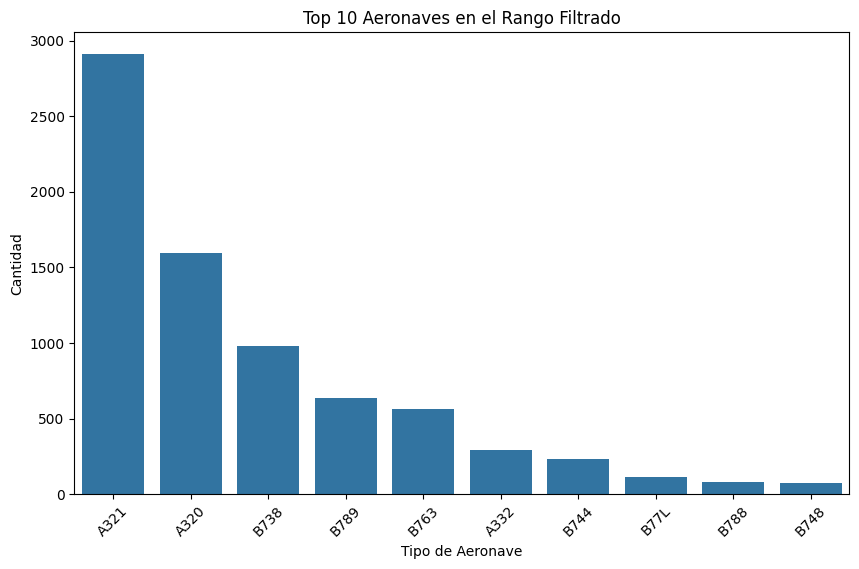

In [11]:
# Asegúrate de que 'Aircraft Type' sea la columna correcta en tu DataFrame
top_10_aeronaves = df_filtrado['Aircraft Type'].value_counts().head(10)

# Crear el gráfico de barras para el top 10 de aeronaves
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(x=top_10_aeronaves.index, y=top_10_aeronaves.values)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x si es necesario
plt.title('Top 10 Aeronaves en el Rango Filtrado')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

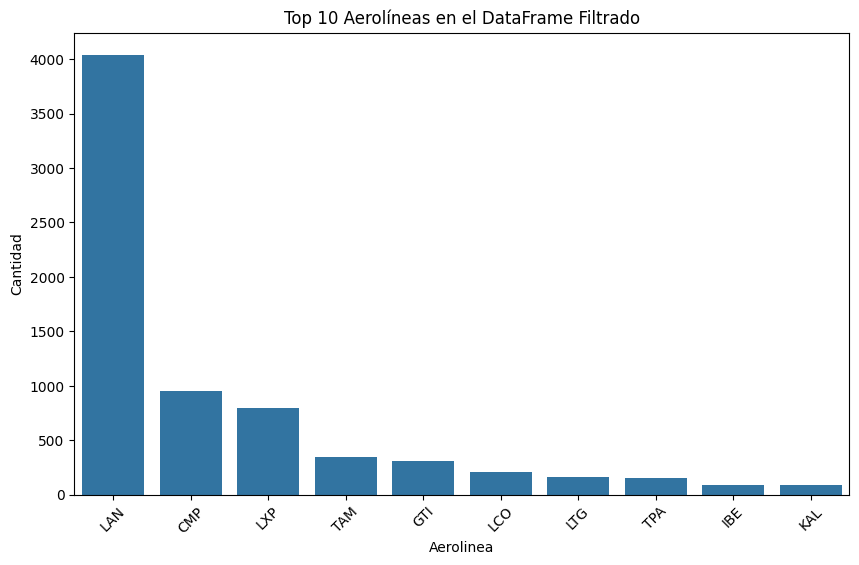

In [12]:
# Obtener las 10 aerolíneas más frecuentes
top_10_aerolineas = df_filtrado['Airline'].value_counts().head(10)

# Crear el gráfico de barras para las 10 aerolíneas más frecuentes
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(x=top_10_aerolineas.index, y=top_10_aerolineas.values)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x si es necesario
plt.title('Top 10 Aerolíneas en el DataFrame Filtrado')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

In [13]:
# 1. Top 3 aeronaves que emiten más ruido (máximo LASmax)
top_3_aeronaves = df_filtrado.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False).head(3)

# 2. Top 3 From/To que generan más ruido (máximo LASmax)
top_3_from_to = df_filtrado.groupby('From/To')['LASmax'].max().sort_values(ascending=False).head(3)

# 3. Top 3 horas con mayor LASmax
top_3_horas = df_filtrado.groupby('Hour')['LASmax'].max().sort_values(ascending=False).head(3)
top_3_horas_formateadas = top_3_horas.index.astype(str) + ":00"

# Mostrar resultados

print("🔊 Top 3 Aeronaves que emiten más ruido:")
for aeronave, ruido in zip(top_3_aeronaves.index, top_3_aeronaves.values):
    print(f"- {aeronave}: {ruido:.2f} dB")

print("\n🌍 Top 3 From/To con mayor ruido:")
for ruta, ruido in zip(top_3_from_to.index, top_3_from_to.values):
    print(f"- {ruta}: {ruido:.2f} dB")

print("\n🕒 Top 3 Horas con mayor LASmax:")
for hora, ruido in zip(top_3_horas_formateadas, top_3_horas.values):
    print(f"- A las {hora}: {ruido:.2f} dB")

🔊 Top 3 Aeronaves que emiten más ruido:
- B744: 95.20 dB
- B722: 95.00 dB
- A21N: 94.70 dB

🌍 Top 3 From/To con mayor ruido:
- KMIA: 95.20 dB
- SUMU: 95.00 dB
- SCAR: 94.70 dB

🕒 Top 3 Horas con mayor LASmax:
- A las 22:00: 95.20 dB
- A las 23:00: 95.00 dB
- A las 2:00: 95.00 dB


In [14]:
# Aeronaves que tienen el lasmax máximo
aeronaves_top = ['B744', 'B722', 'A21N']

# Filtrar todas las filas donde Aircraft Type sea una de estas tres
df_top_aeronaves = df_filtrado[df_filtrado['Aircraft Type'].isin(aeronaves_top)]
df_top_aeronaves_completo = df[df['Aircraft Type'].isin(aeronaves_top)]


In [15]:
max_ruido_por_aeronave = df_filtrado.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False)

# Mostrar
print(max_ruido_por_aeronave.head(10))

Aircraft Type
B744    95.2
B722    95.0
A21N    94.7
B763    92.4
A20N    90.9
B748    90.8
A321    90.4
C17     89.8
A332    89.5
B77L    89.1
Name: LASmax, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir variables predictoras y objetivo
X = df[['Temperature [øC]', 'EPNL', 'Leq', 'SEL']]
y = df['LASmax']

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 1.0032632990846013


In [ ]:
bkjbkjb